In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [24]:
dataset_path = '../../data/benchmark/lt2_windows__cvs_gt2.csv'
# dataset_path = '../../data/benchmark/multiple_windows.csv'


n_preds_path = '../../data/benchmark/preds/n_esm2.npy'
c_preds_path = '../../data/benchmark/preds/c_esm2.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm_att.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm_att.npy'
# n_preds_path = '../../data/benchmark/preds2/n_bilstm.npy'
# c_preds_path = '../../data/benchmark/preds2/c_bilstm.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm_mw.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm_mw.npy'

In [25]:
data_df = pd.read_csv(dataset_path)
data_df.head()

,protein,cleavages
0,AAADSAQWLSVKEETIFLHDGLIRVTDLAELPSEILGAPEAADTDL...,"[(52, 63), (17, 25), (52, 62)]"
1,ACAWLEAQEEEEVGFPVRPQVPLRPMTYKAAVDLSHFLKEKGGLEG...,"[(29, 37), (141, 150), (141, 149)]"
2,AFAQRALSDSLSRRLRRHVPTHQSRRRSLGHLSPTARRACEDAIRC...,"[(108, 116), (92, 100), (103, 112), (74, 82), ..."
3,AWRRRRSGTSGKATWWCSGLRRASPTPSRRVQSWATAVMWKPSPSS...,"[(224, 232), (225, 233), (219, 232), (65, 73)]"
4,DHVASCGVNLYQFYGPSGQFTHEFDGDEQFYVDLEKKETAWRWPEF...,"[(38, 46), (22, 31), (22, 32), (41, 49), (22, ..."


In [26]:
c_preds = np.load(c_preds_path, allow_pickle=True)
n_preds = np.load(n_preds_path, allow_pickle=True)

n_preds.shape, c_preds.shape

((867,), (867,))

In [27]:
cleavages = data_df['cleavages'].apply(literal_eval).values
seq_lens = data_df['protein'].apply(len).values

In [28]:
n_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]
c_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]

for i, cleavage in enumerate(cleavages):
    for n, c in cleavage:
        n_targets[i][n - 1] = 1
        c_targets[i][c - 1] = 1

In [29]:
n_preds[1][:100]

array([-1.5493163 , -1.477784  , -0.6431524 , -1.3312005 , -0.31533682,
       -0.59963495, -1.1217619 , -0.05622941,  0.00632592, -0.83161736,
        0.31935447, -1.0659126 , -0.5861283 , -1.4277213 ,  0.20779882,
       -1.3989862 , -1.4045691 , -0.8790149 , -1.3232083 , -1.1423447 ,
       -0.15992059, -1.2301158 , -1.1734009 , -0.2195705 , -1.6082132 ,
       -0.54565763, -0.8597211 , -1.6202878 , -0.3930518 , -0.01408741,
       -0.34304947, -0.92231363, -1.3887542 , -0.8262506 , -0.33348638,
       -1.0136576 ,  0.08828376, -1.4210712 , -0.04439436, -1.618097  ,
       -1.1323441 , -1.0056063 , -0.32333136, -0.8596663 , -1.4822098 ,
       -0.90499717, -0.8370078 , -0.1336657 , -1.0613092 , -1.2241453 ,
       -0.9935928 ,  1.1524882 , -1.1158568 , -1.2499862 , -0.8290754 ,
       -0.21598546, -1.4967397 , -1.0162532 , -1.5972667 , -0.9724007 ,
       -0.32270867, -0.6361343 , -0.37956482, -1.046321  , -1.2337267 ,
       -0.76311237,  0.4928723 , -0.37259036, -1.5076097 , -1.60

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
n_preds = [sigmoid(pred) for pred in n_preds]
c_preds = [sigmoid(pred) for pred in c_preds]

In [32]:
n_preds[0], n_targets[0]

(array([0.47291437, 0.57571363, 0.20895435, 0.27256435, 0.31234348,
        0.49782002, 0.21308649, 0.22252758, 0.33195233, 0.43059996,
        0.1858279 , 0.3521353 , 0.3376633 , 0.5065383 , 0.29327598,
        0.2530607 , 0.4906245 , 0.33899587, 0.27961215, 0.22304684,
        0.3563569 , 0.22074313, 0.42774245, 0.3917463 , 0.40381032,
        0.2547266 , 0.26925185, 0.23390807, 0.6422233 , 0.32513678,
        0.5538558 , 0.18562925, 0.32475355, 0.25410038, 0.29466   ,
        0.2473898 , 0.3581459 , 0.6029191 , 0.2151792 , 0.38179174,
        0.34068054, 0.20774594, 0.38017696, 0.30772215, 0.20103541,
        0.38746017, 0.3203793 , 0.28755048, 0.31707647, 0.24807149,
        0.34965956, 0.47624537, 0.3737139 , 0.19574408, 0.4458869 ,
        0.21552825, 0.33451423, 0.29643092, 0.29898688, 0.3781772 ,
        0.3605462 , 0.37214425, 0.19989909, 0.35577923, 0.42168745,
        0.20249602, 0.15639712, 0.21377671, 0.44574136, 0.33836973,
        0.19947584, 0.3817433 , 0.2718124 , 0.37

In [33]:
n_preds[0] - n_targets[0]

array([ 0.47291437,  0.57571363,  0.20895435,  0.27256435,  0.31234348,
        0.49782002,  0.21308649,  0.22252758,  0.33195233,  0.43059996,
        0.1858279 ,  0.3521353 ,  0.33766329,  0.50653827,  0.29327598,
        0.2530607 , -0.50937551,  0.33899587,  0.27961215,  0.22304684,
        0.35635689,  0.22074313,  0.42774245,  0.39174631,  0.40381032,
        0.25472659,  0.26925185,  0.23390807,  0.6422233 ,  0.32513678,
        0.55385578,  0.18562925,  0.32475355,  0.25410038,  0.29466   ,
        0.24738979,  0.35814589,  0.6029191 ,  0.2151792 ,  0.38179174,
        0.34068054,  0.20774594,  0.38017696,  0.30772215,  0.20103541,
        0.38746017,  0.32037929,  0.28755048,  0.31707647,  0.24807149,
        0.34965956, -0.52375463,  0.37371391,  0.19574408,  0.44588691,
        0.21552825,  0.33451423,  0.29643092,  0.29898688,  0.3781772 ,
        0.3605462 ,  0.37214425,  0.19989909,  0.35577923,  0.42168745,
        0.20249602,  0.15639712,  0.21377671,  0.44574136,  0.33

In [34]:
c_preds_concat = np.concatenate(c_preds)
n_preds_concat = np.concatenate(n_preds)

c_targets_concat = np.concatenate(c_targets)
n_targets_concat = np.concatenate(n_targets)

c_preds_concat.shape, n_preds_concat.shape, c_targets_concat.shape, n_targets_concat.shape

((397783,), (397783,), (397783,), (397783,))

In [35]:
from sklearn import metrics

In [36]:
fpr_c, tpr_c, thresholds_c = metrics.roc_curve(c_targets_concat, c_preds_concat)
fpr_n, tpr_n, thresholds_n = metrics.roc_curve(n_targets_concat, n_preds_concat)

roc_auc_c = metrics.auc(fpr_c, tpr_c)
roc_auc_n = metrics.auc(fpr_n, tpr_n)

print(f"C - Terminus ROC AUC: {roc_auc_c}")
print(f"N - Terminus ROC AUC: {roc_auc_n}")

C - Terminus ROC AUC: 0.4697204954822001
N - Terminus ROC AUC: 0.6721562688452857


In [37]:
import matplotlib.pyplot as plt

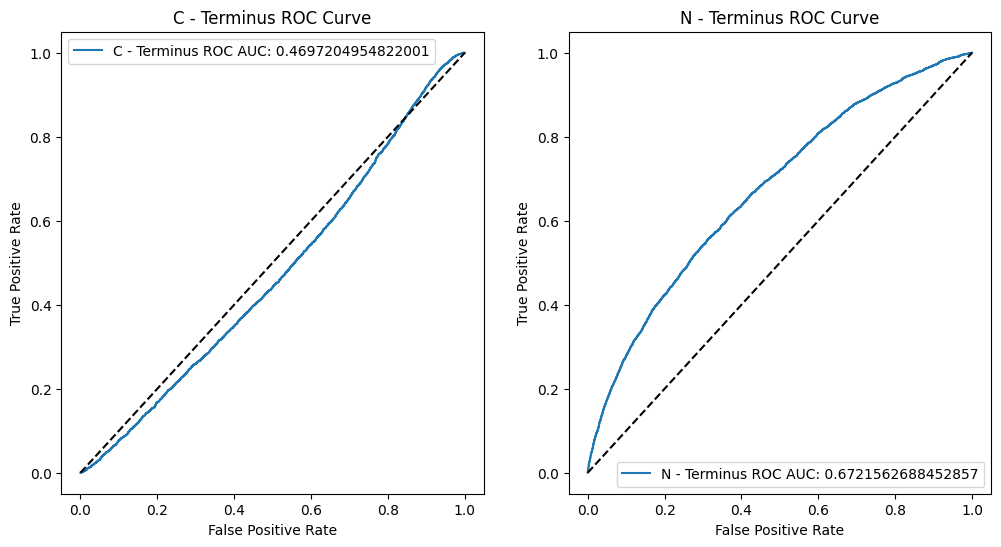

In [38]:
# plot ROC curves for both models (on separate plots):

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(fpr_c, tpr_c, label=f"C - Terminus ROC AUC: {roc_auc_c}")
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('C - Terminus ROC Curve')
ax[0].legend()

ax[1].plot(fpr_n, tpr_n, label=f"N - Terminus ROC AUC: {roc_auc_n}")
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('N - Terminus ROC Curve')
ax[1].legend()

plt.show()

In [53]:
trh = 0.7

In [54]:
print(f"C Terminus Precission: {metrics.precision_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus Precission: {metrics.precision_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus Precission: 0.0054260279779567615
N Terminus Precission: 0.04390360295872107


In [55]:
print(f"C Terminus Recall: {metrics.recall_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus Recall: {metrics.recall_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus Recall: 0.017246025330099703
N Terminus Recall: 0.04954227248249865


In [56]:
print(f"C Terminus F1: {metrics.f1_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus F1: {metrics.f1_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus F1: 0.008254869082935637
N Terminus F1: 0.0465528146742568


In [57]:
for i in range(10):
    pos_n_preds_idx = np.where(n_preds[i] > trh)[0]
    pos_c_preds_idx = np.where(c_preds[i] > trh)[0]
    pos_n_targets_idx = np.where(n_targets[i])[0]
    pos_c_targets_idx = np.where(c_targets[i])[0]

    print(f"Protein {i}")
    print(f"Positive N preds: {pos_n_preds_idx}")
    print(f"Positive N targets: {pos_n_targets_idx}")
    print()
    print(f"Positive C preds: {pos_c_preds_idx}")
    print(f"Positive C targets: {pos_c_targets_idx}")
    print()

Protein 0
Positive N preds: []
Positive N targets: [16 51]

Positive C preds: [59 74]
Positive C targets: [24 61 62]

Protein 1
Positive N preds: [51]
Positive N targets: [ 28 140]

Positive C preds: [ 28  67  82 117]
Positive C targets: [ 36 148 149]

Protein 2
Positive N preds: [ 70 158 195 263 447 478 500 540]
Positive N targets: [ 73  91 102 107 309]

Positive C preds: [ 92 142 152 177 184 191 203 362 372 379 415 426 432 460 466 488 503 517
 573]
Positive C targets: [ 81  99 111 115 319]

Protein 3
Positive N preds: [ 40  87 103 119 135 151 218]
Positive N targets: [ 64 218 223 224]

Positive C preds: [ 15  34  51  73 198 232 257]
Positive C targets: [ 72 231 232]

Protein 4
Positive N preds: [21]
Positive N targets: [21 37 38 40]

Positive C preds: [20 24 74]
Positive C targets: [29 30 31 45 48]

Protein 5
Positive N preds: [  0  19  36  82 125 141 154]
Positive N targets: [106 109 156]

Positive C preds: [  3  47  80 100 118 134]
Positive C targets: [117 164]

Protein 6
Positive 